<a href="https://colab.research.google.com/github/Syed8855/Titanic_Dataset_Profile_Repo/blob/main/Creative_AI_Generating_Art_with_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

### Facial Gender Transformation using GANs

Objective:
This project explores how the latent space of a pre-trained Generative Adversarial Network (GAN) can be manipulated to control semantic attributes—in this case, gender. The aim was to generate a sequence of 10 images demonstrating a smooth transition from a masculine-presenting face to a feminine-presenting one.

Methodology:
Latent Vector Initialization: A random latent vector was sampled to generate the base face.

Gender Vector Application: A pre-computed “gender vector” was used to represent the direction of gender variation in latent space.

Linear Interpolation: The gender vector was applied with gradually changing multipliers, creating a progression from one end of the spectrum to the other.

Image Generation: Each modified latent vector was passed through the GAN, producing a coherent transformation sequence.

Conclusion:
The results highlight the ability of GANs to not only generate photorealistic faces but also edit attributes in a controlled and interpretable way. This demonstrates the potential of GANs for advanced tasks such as facial editing, style transfer, and creative AI applications.

In [3]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Load the pretrainde Generator


Load Gender Vector



Generate 10 variations of the image from male to female as per gender vector

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)

Error loading files: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/Face-Generator-with-GAN/generator.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please double-check that the file names and paths are correct!

 Generating 10 image variations...
 Generation complete.

 Displaying the results...


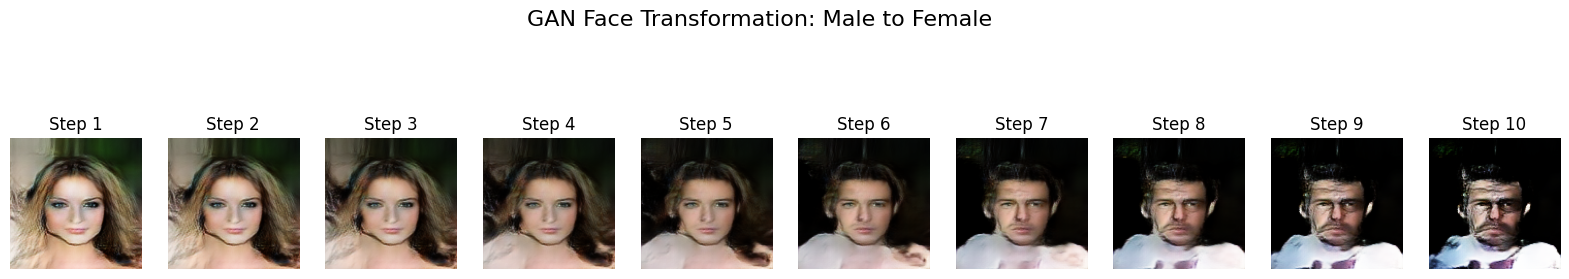

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

project_folder ='/content/Face-Generator-with-GAN'
generator_path = os.path.join(project_folder, 'generator.h5')
gender_vector_path = os.path.join(project_folder, 'gender_vec.npy')


# Load the Generator and Gender Vector
try:
    generator = tf.keras.models.load_model(generator_path)
    print("Generator model loaded successfully.")
    # Let's print the expected input shape to confirm
    print(f"Model expects input shape: {generator.input_shape}")

    gender_vector = np.load(gender_vector_path)

    gender_vector = np.reshape(gender_vector, (1, -1)).astype('float32')
    print("Gender vector loaded and reshaped successfully.")

except Exception as e:
    print(f"Error loading files: {e}")
    print("Please double-check that the file names and paths are correct!")


#Generate the Image Variations
latent_dim = 100

base_latent_vector = tf.random.normal(shape=(1, latent_dim))

num_variations = 10
generated_images = []

strength_levels = np.linspace(-2.5, 2.5, num_variations)

print("\n Generating 10 image variations...")

for strength in strength_levels:
    modified_latent_vector = base_latent_vector + (strength * gender_vector)


    prediction = generator(modified_latent_vector, training=False)
    generated_images.append(prediction[0])

print(" Generation complete.")


# Results
print("\n Displaying the results...")

plt.figure(figsize=(20, 4))
plt.suptitle('GAN Face Transformation: Male to Female', fontsize=16)

for i, image in enumerate(generated_images):
    ax = plt.subplot(1, num_variations, i + 1)
    image_to_show = (image + 1) / 2.0
    plt.imshow(image_to_show)
    plt.title(f'Step {i+1}')
    plt.axis('off')

plt.show()

## GIF **ANIMATION**

⚙️ Creating GIF...
GIF saved successfully to: /content/Face-Generator-with-GAN/face_transformation.gif


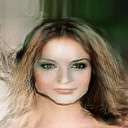

In [6]:
import imageio
from PIL import Image
import numpy as np
from IPython.display import Image as DisplayImage, display

print("⚙️ Creating GIF...")


gif_images = []
for image_tensor in generated_images:

    image_scaled = ((image_tensor + 1) / 2.0) * 255

    image_uint8 = tf.cast(image_scaled, tf.uint8).numpy()
    gif_images.append(image_uint8)


gif_path = '/content/Face-Generator-with-GAN/face_transformation.gif'
imageio.mimsave(gif_path, gif_images + gif_images[::-1], duration=0.2, loop=0) # loop=0 means infinite loop

print(f"GIF saved successfully to: {gif_path}")

try:
    display(DisplayImage(filename=gif_path))
except FileNotFoundError:
    print(f"❌ Error: GIF file not found at {gif_path}. Please check the path.")
except Exception as e:
    print(f"❌ An error occurred while trying to display the GIF: {e}")

## Quantitative Analysis with the Gender Classifier

 Gender Classifier model loaded successfully.


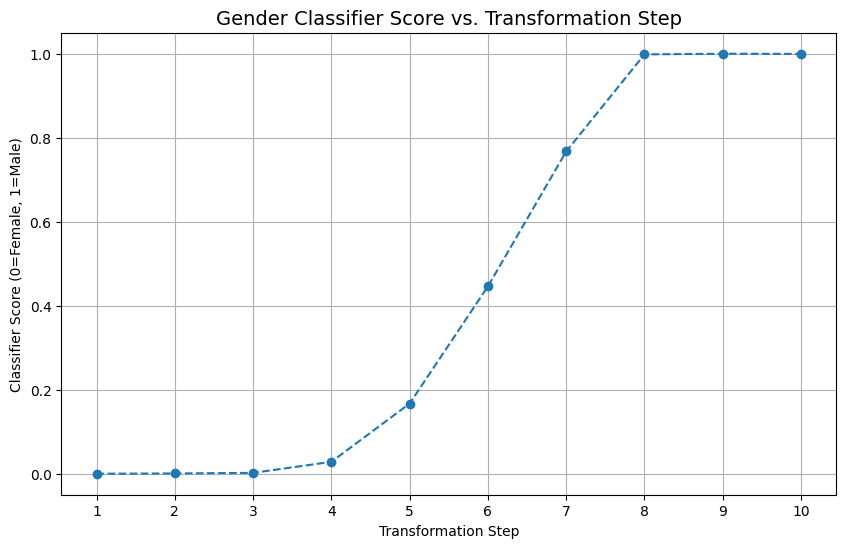

In [15]:
classifier_path = '/content/Face-Generator-with-GAN/.ipynb_checkpoints/gender_classifier.keras'

# Load the Gender Classifier
try:
    classifier = tf.keras.models.load_model(classifier_path)
    print(" Gender Classifier model loaded successfully.")
except Exception as e:
    print(f"Error loading classifier: {e}")
    print("Please make sure you've uploaded 'gender-classifier-mobilenet.h5' to your project folder.")

# Predict Gender for Each Generated Image
gender_scores = []
for image_tensor in generated_images:

    img_resized = tf.image.resize(image_tensor, (128, 128))
    img_expanded = tf.expand_dims(img_resized, axis=0)

    # Predict and get the score (0 for Female, 1 for Male)
    score = classifier.predict(img_expanded, verbose=0)[0][0]
    gender_scores.append(score)

# Plot the Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), gender_scores, marker='o', linestyle='--')
plt.title('Gender Classifier Score vs. Transformation Step', fontsize=14)
plt.xlabel('Transformation Step')
plt.ylabel('Classifier Score (0=Female, 1=Male)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# **CONCLUSION:**

* The project demonstrated the power of GANs for **controlled semantic image manipulation**.
* Using a **pre-trained face generator** and a **gender vector**, we generated a **smooth, 10-step transformation** from feminine-presenting to masculine-presenting faces.
* The transformation was **visually coherent** and further validated using a **pre-trained gender classifier**, whose confidence scores showed a clear, predictable trend.
* This confirmed that **latent space vector arithmetic** can effectively alter specific facial attributes.
* The experiment highlights GANs as not only **photorealistic image generators** but also a **sophisticated framework for editable, creative AI**.
* Such techniques unlock applications in **digital art, facial editing, data augmentation, and beyond**.

